In [27]:
import rootpath
import sys
sys.path.append(rootpath.detect())

import numpy as np
import matplotlib.pyplot as plt
from testsuite.utilities import Pareto_split
from testsuite.directed_optimisers import DmVector
from testsuite.surrogates import GP, MultiSurrogate
import wfg

In [28]:
# setup function
n_obj = 2  # Number of objectives
kfactor = 4
lfactor = 4
k = kfactor * (n_obj - 1)  # position related params
l = lfactor * 2  # distance related params
n_dim = k + l
limits = np.zeros((2, n_dim))
limits[1] = np.array(range(1, n_dim + 1)) * 2

func = wfg.WFG5
gp_surr_multi = MultiSurrogate(GP, scaled=True)


def test_function(x):
    if x.ndim < 2:
        x = x.reshape(1, -1)
    return np.array([func(xi, k, n_obj) for xi in x])


In [29]:
M = n_obj
N = 500
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n, :] = func(z, k, M)
    x[n, :] = z

In [32]:
dmv = np.array([[1.5, 1.]])
dmv = np.array([[1, 2.5]])
dmv = dmv/np.linalg.norm(dmv)
opt = DmVector(objective_function=test_function, ei=False, w=0.5,
               limits=limits, surrogate=gp_surr_multi, n_initial=10, budget=20,
               seed=10, cmaes_restarts=0, dmv=dmv)

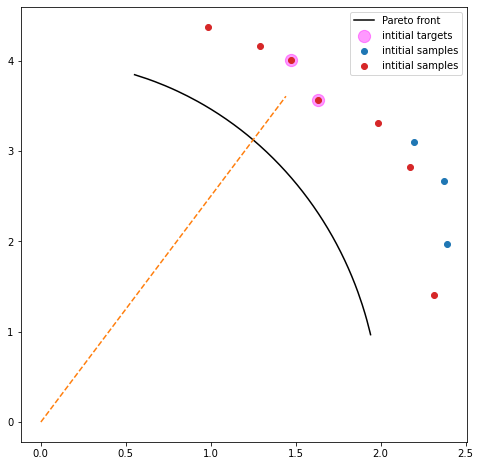

In [33]:
fig01 = plt.figure(figsize=[8, 8])
fig01_ax = fig01.gca()


fig01_ax.scatter(*opt.targets.T, c="magenta", label="intitial targets", alpha=0.4, s=150)
fig01_ax.plot(*y[np.argsort(y[:,0])].T, c="k", label="Pareto front")
fig01_ax.scatter(*opt.d.T, c="C0", label="intitial samples")
fig01_ax.scatter(*opt.p.T, c="C3", label="intitial samples")
fig01_ax.plot(*np.vstack((np.zeros_like(dmv), dmv*np.max([np.linalg.norm(yi) for yi in y]))).T, c="C1", linestyle="--")

fig01_ax.legend()


In [21]:
opt.optimise(40)

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 18.818692954312613
Optimization restart 2/10, f = 140.18353157948656
Optimization restart 3/10, f = 18.818692954313263
Optimization restart 4/10, f = 29.797709197298133
Optimization restart 5/10, f = 55.76958334055768


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 6/10, f = 18.818692954312446
Optimization restart 7/10, f = 18.818692954312493
Optimization restart 8/10, f = 55.76958348872577
Optimization restart 9/10, f = 18.818692954312393
Optimization restart 10/10, f = 18.818692954312795
Optimization restart 1/10, f = 22.440822860569803
Optimization restart 2/10, f = 140.18353157948656
Optimization restart 3/10, f = 22.440822860567028
Optimization restart 4/10, f = 22.440822860599937
Optimization restart 5/10, f = 29.797709197298126
Optimization restart 6/10, f = 29.797709197298126
Optimization restart 7/10, f = 22.44082286056763
Optimization restart 8/10, f = 29.797709197359833
Optimization restart 9/10, f = 68.88745001053618
Optimization restart 10/10, f = 22.44082286056774
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=721869, Tue Jul  6 16:50:32 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.435234675745500e-01 1.0e+00 2.47e-01  2e-01  3e-01 0:00.0
    2     22 -

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:50:47 2021)
final/bestever f-value = -4.662054e-01 -4.662054e-01
incumbent solution: [0.22184512 1.27095184 4.69052472 4.120841   0.95722345 4.70015022
 8.92881518 2.51529964 ...]
std deviations: [2.24792659e-06 3.07326951e-06 4.54787583e-06 1.05454420e-05
 1.58077707e-05 1.06104150e-05 1.08967802e-05 2.45363950e-05 ...]
Optimization restart 1/10, f = 20.459094083841478
Optimization restart 2/10, f = 57.157992381221035
Optimization restart 3/10, f = 31.216647730502803
Optimization restart 4/10, f = 146.8589378451764
Optimization restart 5/10, f = 20.459094083840004
Optimization restart 6/10, f = 146.8589378451764
Optimization restart 7/10, f = 20.459094083839048
Optimization restart 8/10, f = 31.216647730502803
Optimization restart 9/10, f = 206836301.36840534


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 146.85888928345463
Optimization restart 1/10, f = 23.754206165335134
Optimization restart 2/10, f = 23.754206165460136
Optimization restart 3/10, f = 146.8589378451764
Optimization restart 4/10, f = 23.75420616558926
Optimization restart 5/10, f = 23.754206165335063
Optimization restart 6/10, f = 23.754206165334942
Optimization restart 7/10, f = 23.754206165338214
Optimization restart 8/10, f = 31.2166477305028
Optimization restart 9/10, f = 71.41532060128597
Optimization restart 10/10, f = 23.754206165334963
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=702137, Tue Jul  6 16:50:49 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.361537418745250e-01 1.0e+00 2.30e-01  2e-01  2e-01 0:00.0
    2     22 -4.367135831362059e-01 1.2e+00 2.21e-01  2e-01  2e-01 0:00.0
    3     33 -4.377802727176696e-01 1.2e+00 2.37e-01  2e-01  2e-01 0:00.1
  100   1100 -4.606821687915650e-01 5.0e+00 8.96e-01  3e-01  1e+00 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:51:03 2021)
final/bestever f-value = -4.633818e-01 -4.633818e-01
incumbent solution: [1.96883502e-09 1.01152819e+00 3.53394549e+00 8.00000000e+00
 1.00000000e+01 1.20000000e+01 4.03786836e+00 8.90437615e+00 ...]
std deviations: [8.75830193e-07 5.84771455e-06 1.29429751e-05 7.86069872e-06
 8.09182236e-06 1.10963482e-05 2.16006393e-05 3.13520914e-05 ...]
Optimization restart 1/10, f = 21.575743249325654
Optimization restart 2/10, f = 21.57574324913974
Optimization restart 3/10, f = 21.575743249261272
Optimization restart 4/10, f = 21.575743249140025
Optimization restart 5/10, f = 236351538.5597235
Optimization restart 6/10, f = 153.53434411086621
Optimization restart 7/10, f = 58.75915286923667
Optimization restart 8/10, f = 21.57574324913966
Optimization restart 9/10, f = 21.575743249139983
Optimization restart 10/10, f = 21.575743249139947


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 24.89029881158227
Optimization restart 2/10, f = 24.890298811692038
Optimization restart 3/10, f = 32.635586263707665
Optimization restart 4/10, f = 24.890298811582202
Optimization restart 5/10, f = 24.890298811608048
Optimization restart 6/10, f = 24.890298811595397
Optimization restart 7/10, f = 24.89029881159083
Optimization restart 8/10, f = 32.63558626370747
Optimization restart 9/10, f = 24.89029881158222
Optimization restart 10/10, f = 73.74256571429936
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=690509, Tue Jul  6 16:51:06 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.421884071436505e-01 1.0e+00 2.39e-01  2e-01  3e-01 0:00.0
    2     22 -4.446142800243160e-01 1.2e+00 2.41e-01  2e-01  3e-01 0:00.0
    3     33 -4.495704320826799e-01 1.3e+00 2.71e-01  3e-01  3e-01 0:00.1
  100   1100 -4.554421979956771e-01 1.1e+01 2.51e-01  4e-02  4e-01 0:02.5
  200   2200 -4.558230556842677e-01 2.7e+01 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:51:19 2021)
final/bestever f-value = -4.558233e-01 -4.558233e-01
incumbent solution: [5.03783728e-11 4.00000000e+00 6.00000000e+00 1.17024804e-11
 1.00000000e+01 1.20000000e+01 1.89501938e+00 1.00239879e-08 ...]
std deviations: [3.01109182e-06 8.30821160e-06 2.00906716e-05 5.77303795e-06
 2.47000704e-05 2.85290154e-05 1.75836988e-08 1.50566198e-05 ...]
Optimization restart 1/10, f = 22.078863513908953
Optimization restart 2/10, f = 22.078863513906278
Optimization restart 3/10, f = 22.078863513906
Optimization restart 4/10, f = 160.2097503765561
Optimization restart 5/10, f = 22.07886351390844
Optimization restart 6/10, f = 22.078863513905993
Optimization restart 7/10, f = 22.07886351390617
Optimization restart 8/10, f = 22.07886351390863


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 22.078863513906228
Optimization restart 10/10, f = 34.05452479691215
Optimization restart 1/10, f = 25.972054566378358
Optimization restart 2/10, f = 25.972054566357222
Optimization restart 3/10, f = 160.2097503765561
Optimization restart 4/10, f = 76.98273005039805
Optimization restart 5/10, f = 25.972054566374545
Optimization restart 6/10, f = 34.05452479691215
Optimization restart 7/10, f = 160.2097503765561
Optimization restart 8/10, f = 34.054524796912204
Optimization restart 9/10, f = 34.05452479691216
Optimization restart 10/10, f = 25.972054566360587
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=712593, Tue Jul  6 16:51:21 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.429433068036004e-01 1.0e+00 2.50e-01  2e-01  3e-01 0:00.0
    2     22 -4.431259058421037e-01 1.2e+00 2.45e-01  2e-01  3e-01 0:00.0
    3     33 -4.449343342378154e-01 1.3e+00 2.70e-01  3e-01  3e-01 0:00.1
  100   1100 -4.52

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:51:43 2021)
final/bestever f-value = -4.625785e-01 -4.625785e-01
incumbent solution: [9.75173351e-09 2.70983583e+00 3.77955537e+00 2.22851716e+00
 1.00000000e+01 1.20000000e+01 6.16417575e+00 1.30237377e+01 ...]
std deviations: [2.08815127e-06 1.11605792e-05 1.75187373e-05 2.65862355e-05
 1.97870276e-05 3.26993756e-05 3.78056097e-05 5.26333395e-05 ...]
Optimization restart 1/10, f = 23.308618585565156
Optimization restart 2/10, f = 166.88515656061415
Optimization restart 3/10, f = 35.47346333011682
Optimization restart 4/10, f = 61.50470413469385
Optimization restart 5/10, f = 23.308618585559344
Optimization restart 6/10, f = 23.30861858555547
Optimization restart 7/10, f = 23.308618585555852
Optimization restart 8/10, f = 166.88515661659966


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 61.5047043870368
Optimization restart 10/10, f = 166.88515664224593
Optimization restart 1/10, f = 27.1964856605345
Optimization restart 2/10, f = 27.19648566053681
Optimization restart 3/10, f = 27.196485660534872
Optimization restart 4/10, f = 166.88515664224593
Optimization restart 5/10, f = 35.473463321091884
Optimization restart 6/10, f = 27.196485660534364
Optimization restart 7/10, f = 79.46859816615762
Optimization restart 8/10, f = 27.19648566053357
Optimization restart 9/10, f = 35.47346333011682
Optimization restart 10/10, f = 27.19648566053442
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=600266, Tue Jul  6 16:51:46 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.380179474328200e-01 1.0e+00 2.32e-01  2e-01  2e-01 0:00.0
    2     22 -4.387051962743919e-01 1.1e+00 2.44e-01  2e-01  3e-01 0:00.1
    3     33 -4.384334949572277e-01 1.3e+00 2.62e-01  2e-01  3e-01 0:00.1
  100   1100 -4.40868

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:51:58 2021)
final/bestever f-value = -4.558211e-01 -4.558211e-01
incumbent solution: [9.12753309e-01 2.76729326e-11 4.92458744e+00 6.82751342e-01
 7.00740463e+00 1.20000000e+01 2.03078600e+00 9.72641868e+00 ...]
std deviations: [1.93992191e-06 1.65285713e-06 5.26009911e-06 9.72231160e-06
 1.39632111e-05 1.08478655e-05 1.59470566e-05 2.68486954e-05 ...]
Optimization restart 1/10, f = 23.970076568448626
Optimization restart 2/10, f = 23.970076568439808
Optimization restart 3/10, f = 173.56056290793578
Optimization restart 4/10, f = 36.89240186332149
Optimization restart 5/10, f = 23.9700765684385
Optimization restart 6/10, f = 23.97007656843986
Optimization restart 7/10, f = 173.56055867703864
Optimization restart 8/10, f = 62.22529539848249


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 23.97007656843848
Optimization restart 10/10, f = 36.892401863322036
Optimization restart 1/10, f = 28.322555699892224
Optimization restart 2/10, f = 28.322555699952353
Optimization restart 3/10, f = 36.89240186332149
Optimization restart 4/10, f = 28.322555699893552
Optimization restart 5/10, f = 376130983.4473554
Optimization restart 6/10, f = 173.56056290793578
Optimization restart 7/10, f = 173.56056290793578
Optimization restart 8/10, f = 28.32255569990251
Optimization restart 9/10, f = 173.56056290793578
Optimization restart 10/10, f = 28.322555699892234
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=752804, Tue Jul  6 16:51:59 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.288082016997763e-01 1.0e+00 2.31e-01  2e-01  2e-01 0:00.0
    2     22 -4.300877141601754e-01 1.1e+00 2.37e-01  2e-01  3e-01 0:00.1
    3     33 -4.302044898377608e-01 1.3e+00 2.45e-01  2e-01  3e-01 0:00.1
  100   1100 -4.

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:52:17 2021)
final/bestever f-value = -5.058003e-01 -5.058003e-01
incumbent solution: [ 0.54450485  1.45378251  2.13755757  5.27464549  9.3386405   9.59256175
  8.95632868 16.         ...]
std deviations: [4.48099898e-07 1.03118747e-06 1.26546391e-06 1.92067799e-06
 2.48547869e-06 3.43370224e-06 2.34297844e-06 1.04631188e-05 ...]
Optimization restart 1/10, f = 22.43283808858448
Optimization restart 2/10, f = 61.095022304635556
Optimization restart 3/10, f = 38.31134039652616
Optimization restart 4/10, f = 22.432838088447934
Optimization restart 5/10, f = 38.31134039652616
Optimization restart 6/10, f = 22.4328380884498
Optimization restart 7/10, f = 61.0950018343398
Optimization restart 8/10, f = 180.23596917362562


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 22.432838088446918
Optimization restart 10/10, f = 38.311340396526155
Optimization restart 1/10, f = 27.415162362530072
Optimization restart 2/10, f = 27.41516236249219
Optimization restart 3/10, f = 27.415162362492744
Optimization restart 4/10, f = 27.415162362496943
Optimization restart 5/10, f = 27.415162362517613
Optimization restart 6/10, f = 27.41516236251838
Optimization restart 7/10, f = 27.415162362494236
Optimization restart 8/10, f = 27.415162362610143
Optimization restart 9/10, f = 27.41516236249396
Optimization restart 10/10, f = 38.31134039652619
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=702952, Tue Jul  6 16:52:20 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.384791369182655e-01 1.0e+00 2.27e-01  2e-01  2e-01 0:00.0
    2     22 -4.395462546243403e-01 1.1e+00 2.12e-01  2e-01  2e-01 0:00.0
    3     33 -4.404002484342699e-01 1.2e+00 2.11e-01  2e-01  2e-01 0:00.1
  100   1100 -4.

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:52:58 2021)
final/bestever f-value = -4.559867e-01 -4.559867e-01
incumbent solution: [6.09357066e-12 2.84201263e+00 5.99999997e+00 2.39739806e-08
 1.38897250e+00 6.54794212e+00 7.92676293e+00 2.70377507e-08 ...]
std deviations: [3.93860141e-06 1.91876858e-05 8.65222678e-06 4.91084107e-06
 6.90012296e-05 5.41516619e-05 2.68488864e-05 7.63937444e-06 ...]
Optimization restart 1/10, f = 23.477513236362675
Optimization restart 2/10, f = 23.477513236361396
Optimization restart 3/10, f = 23.47751323636102
Optimization restart 4/10, f = 23.477513236362675
Optimization restart 5/10, f = 23.477513236524405
Optimization restart 6/10, f = 23.477513236360736
Optimization restart 7/10, f = 23.477513236361133
Optimization restart 8/10, f = 186.91137543931546


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 186.91137543931546
Optimization restart 10/10, f = 23.477513236360494
Optimization restart 1/10, f = 28.50663008779846
Optimization restart 2/10, f = 28.506630087470086
Optimization restart 3/10, f = 39.73027892973111
Optimization restart 4/10, f = 39.73027892973084
Optimization restart 5/10, f = 28.50663008747008
Optimization restart 6/10, f = 28.50663008747012
Optimization restart 7/10, f = 39.73027892973084
Optimization restart 8/10, f = 81.8222274760602
Optimization restart 9/10, f = 28.506630087470448
Optimization restart 10/10, f = 186.91137543931546
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=683339, Tue Jul  6 16:53:01 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.370394258549198e-01 1.0e+00 2.39e-01  2e-01  2e-01 0:00.0
    2     22 -4.374179437229557e-01 1.2e+00 2.27e-01  2e-01  2e-01 0:00.0
    3     33 -4.384763422974397e-01 1.2e+00 2.22e-01  2e-01  2e-01 0:00.1
  100   1100 -4.4432

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:53:19 2021)
final/bestever f-value = -4.618236e-01 -4.618236e-01
incumbent solution: [ 0.05198539  2.2144826   3.91328168  0.16142349  0.60609273  1.30573393
 12.4806035  10.48731378 ...]
std deviations: [1.65388636e-06 3.03789652e-06 2.90625774e-06 4.31040173e-06
 9.86710866e-06 8.87871883e-06 9.32708746e-06 1.68710725e-05 ...]
Optimization restart 1/10, f = 24.184192107164485
Optimization restart 2/10, f = 24.184192107402968
Optimization restart 3/10, f = 303485886.3603278
Optimization restart 4/10, f = 24.184192107211096
Optimization restart 5/10, f = 24.18419210722593
Optimization restart 6/10, f = 24.184192107164762
Optimization restart 7/10, f = 24.184192107163952
Optimization restart 8/10, f = 24.18419210716393


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 24.184192107163724
Optimization restart 10/10, f = 24.18419210765552
Optimization restart 1/10, f = 29.966716209519824
Optimization restart 2/10, f = 29.96671620362473
Optimization restart 3/10, f = 84.08850970278763
Optimization restart 4/10, f = 29.966716203644182
Optimization restart 5/10, f = 435790186.5957704
Optimization restart 6/10, f = 84.08850968229055
Optimization restart 7/10, f = 29.966716203620564
Optimization restart 8/10, f = 41.14921746293551
Optimization restart 9/10, f = 193.5867817050053
Optimization restart 10/10, f = 41.149216334246404
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=646996, Tue Jul  6 16:53:22 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.373682820925194e-01 1.0e+00 2.50e-01  2e-01  3e-01 0:00.0
    2     22 -4.373226063867522e-01 1.2e+00 2.64e-01  3e-01  3e-01 0:00.1
    3     33 -4.382789287506701e-01 1.3e+00 2.91e-01  3e-01  3e-01 0:00.1
  100   1100 -4.468

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:53:40 2021)
final/bestever f-value = -4.484785e-01 -4.484785e-01
incumbent solution: [3.14934503e-11 4.00000000e+00 2.93573295e+00 8.00000000e+00
 6.41152362e-11 1.20000000e+01 1.63249147e-11 1.60000000e+01 ...]
std deviations: [1.66283587e-06 4.42532115e-06 1.28135593e-09 1.02583595e-05
 4.55084363e-06 1.42149487e-05 2.64843479e-06 2.49449902e-05 ...]
Optimization restart 1/10, f = 25.16583722403955
Optimization restart 2/10, f = 25.165837224039798
Optimization restart 3/10, f = 25.16583722403886
Optimization restart 4/10, f = 25.16583722404264
Optimization restart 5/10, f = 200.26218797069515
Optimization restart 6/10, f = 25.165837224486154
Optimization restart 7/10, f = 200.26218797069515
Optimization restart 8/10, f = 42.56815599614018
Optimization restart 9/10, f = 25.165837224039652


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 25.165837224039358
Optimization restart 1/10, f = 30.996554007167475
Optimization restart 2/10, f = 448523393.6820463
Optimization restart 3/10, f = 30.99655400730544
Optimization restart 4/10, f = 30.996554007156288
Optimization restart 5/10, f = 200.26218797069515
Optimization restart 6/10, f = 30.996554007232298
Optimization restart 7/10, f = 30.996554007156274
Optimization restart 8/10, f = 42.56815599614018
Optimization restart 9/10, f = 30.996554007157158
Optimization restart 10/10, f = 30.996554007156274
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=648980, Tue Jul  6 16:53:43 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.356299893153888e-01 1.0e+00 2.46e-01  2e-01  2e-01 0:00.0
    2     22 -4.370984778362689e-01 1.2e+00 2.39e-01  2e-01  2e-01 0:00.0
    3     33 -4.375888613787178e-01 1.2e+00 2.42e-01  2e-01  2e-01 0:00.1
  100   1100 -4.493521741782599e-01 8.7e+00 1.74e-01  4e-02  3e-0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:54:12 2021)
final/bestever f-value = -4.511869e-01 -4.511869e-01
incumbent solution: [1.57796488e-01 4.00000000e+00 9.33320841e-12 8.00000000e+00
 9.54919678e+00 1.20000000e+01 1.54936625e+00 1.60000000e+01 ...]
std deviations: [5.01418509e-06 6.40463867e-06 2.40701615e-06 1.05615165e-05
 5.63784642e-05 3.03603641e-05 4.47614389e-05 3.03172501e-05 ...]
Optimization restart 1/10, f = 26.861541434030357
Optimization restart 2/10, f = 43.98709452934571
Optimization restart 3/10, f = 26.86154143390377
Optimization restart 4/10, f = 26.8615414339043
Optimization restart 5/10, f = 26.861541433904176
Optimization restart 6/10, f = 206.93759423638502
Optimization restart 7/10, f = 26.861541433903653
Optimization restart 8/10, f = 43.987094529344986
Optimization restart 9/10, f = 26.861541433956894


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 26.861541433904026
Optimization restart 1/10, f = 32.25127498300691
Optimization restart 2/10, f = 32.25127498298033
Optimization restart 3/10, f = 32.25127498299521
Optimization restart 4/10, f = 32.251274982980334
Optimization restart 5/10, f = 206.93759423638502
Optimization restart 6/10, f = 32.25127498298193
Optimization restart 7/10, f = 32.25127498298269
Optimization restart 8/10, f = 32.251274982980505
Optimization restart 9/10, f = 32.25127498298034
Optimization restart 10/10, f = 32.25127498298032
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=686044, Tue Jul  6 16:54:14 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.332976164314547e-01 1.0e+00 2.38e-01  2e-01  2e-01 0:00.0
    2     22 -4.335440075982955e-01 1.2e+00 2.34e-01  2e-01  2e-01 0:00.1
    3     33 -4.339751361755185e-01 1.2e+00 2.37e-01  2e-01  3e-01 0:00.1
  100   1100 -5.057081073599553e-01 7.5e+00 3.61e-01  7e-02  4e-01 0:

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/cma/utilities/utils.py:329: UserWarning:
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=1228)


 1262  13882 -5.101662792329715e-01 3.3e+00 2.04e-04  2e-04  2e-04 0:35.8


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:54:54 2021)
final/bestever f-value = -5.101663e-01 -5.101663e-01
incumbent solution: [ 0.5493024   1.59746071  1.67763393  5.47694712  9.93750898  9.52943397
  8.31783206 16.         ...]
std deviations: [0.00021517 0.00017699 0.00017426 0.00018735 0.00022404 0.00019082
 0.00017939 0.00018117 ...]
Optimization restart 1/10, f = 26.011291964206237
Optimization restart 2/10, f = 26.011291964105318
Optimization restart 3/10, f = 45.406033062549525
Optimization restart 4/10, f = 26.01129196410606
Optimization restart 5/10, f = 45.406033062549525
Optimization restart 6/10, f = 26.01129196410593
Optimization restart 7/10, f = 26.01129196410617
Optimization restart 8/10, f = 26.011291964107723


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 9/10, f = 26.011291964107798
Optimization restart 10/10, f = 213.61300050207478


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 32.14073862584965
Optimization restart 2/10, f = 45.40603306254966
Optimization restart 3/10, f = 45.406033062549525
Optimization restart 4/10, f = 45.406033062549525
Optimization restart 5/10, f = 45.406033062549525
Optimization restart 6/10, f = 45.406033062549525
Optimization restart 7/10, f = 90.3893601667163
Optimization restart 8/10, f = 32.140738625767966
Optimization restart 9/10, f = 45.406033062549525
Optimization restart 10/10, f = 581266494.0722246
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=712987, Tue Jul  6 16:54:56 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.315587442848093e-01 1.0e+00 2.35e-01  2e-01  2e-01 0:00.0
    2     22 -4.333265709400564e-01 1.1e+00 2.26e-01  2e-01  2e-01 0:00.0
    3     33 -4.337489740841555e-01 1.1e+00 2.18e-01  2e-01  2e-01 0:00.1
  100   1100 -5.038566320357329e-01 7.3e+00 6.85e-01  2e-01  8e-01 0:02.5
  200   2200 -5.085443619063665e-01 4.7e+01 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:55:17 2021)
final/bestever f-value = -5.087388e-01 -5.087388e-01
incumbent solution: [ 0.50282156  1.2713251   2.02530824  4.91683178  9.51064193 10.31822295
 10.30701553 16.         ...]
std deviations: [6.71359746e-07 1.74694616e-06 1.99830498e-06 4.01129064e-06
 6.80629657e-06 6.19706933e-06 5.70502867e-06 1.09729004e-05 ...]
Optimization restart 1/10, f = 24.7499060229577
Optimization restart 2/10, f = 24.749906023094656
Optimization restart 3/10, f = 24.749906022957287
Optimization restart 4/10, f = 24.749906022963476
Optimization restart 5/10, f = 63.92536634759458
Optimization restart 6/10, f = 46.82497159575425
Optimization restart 7/10, f = 24.749906022957482
Optimization restart 8/10, f = 1648192.0265448256


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 24.749906022956438
Optimization restart 10/10, f = 24.749906022987233
Optimization restart 1/10, f = 31.225500881771396
Optimization restart 2/10, f = 558545895.1164588
Optimization restart 3/10, f = 31.22550088174014
Optimization restart 4/10, f = 220.28840676776463
Optimization restart 5/10, f = 31.225500881740174
Optimization restart 6/10, f = 31.225500881747784
Optimization restart 7/10, f = 220.28840676776463
Optimization restart 8/10, f = 31.225500881748204
Optimization restart 9/10, f = 31.225500881758947
Optimization restart 10/10, f = 31.22550088174063
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=645294, Tue Jul  6 16:55:20 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.269606919413395e-01 1.0e+00 2.39e-01  2e-01  2e-01 0:00.0
    2     22 -4.278339763532460e-01 1.2e+00 2.26e-01  2e-01  2e-01 0:00.0
    3     33 -4.273971546345511e-01 1.2e+00 2.27e-01  2e-01  2e-01 0:00.0
  100   1100 -4

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:56:14 2021)
final/bestever f-value = -4.423866e-01 -4.423866e-01
incumbent solution: [2.00000000e+00 1.91537750e-11 5.99999985e+00 8.00000000e+00
 5.64281517e-12 1.20000000e+01 7.92288373e-09 1.59997831e+01 ...]
std deviations: [2.94604001e-06 2.97464359e-06 6.95682082e-06 1.91628070e-05
 4.14143613e-06 1.97275468e-05 3.11963935e-06 2.15567855e-05 ...]
Optimization restart 1/10, f = 25.792553316396106
Optimization restart 2/10, f = 25.792553316444586
Optimization restart 3/10, f = 25.792553316382875
Optimization restart 4/10, f = 25.792553316384726
Optimization restart 5/10, f = 25.792553316383838
Optimization restart 6/10, f = 25.79255331638526
Optimization restart 7/10, f = 25.79255331638228
Optimization restart 8/10, f = 25.792553316383035
Optimization restart 9/10, f = 48.2439101289589


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 25.792553316383987
Optimization restart 1/10, f = 32.41247344901834
Optimization restart 2/10, f = 32.4124734490285
Optimization restart 3/10, f = 48.24391012895887
Optimization restart 4/10, f = 32.41247344901935
Optimization restart 5/10, f = 575142292.7588055
Optimization restart 6/10, f = 32.412473449020275
Optimization restart 7/10, f = 32.412473449042416
Optimization restart 8/10, f = 226.96381303345447
Optimization restart 9/10, f = 226.96381303345447
Optimization restart 10/10, f = 226.96381303345447
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=735121, Tue Jul  6 16:56:16 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.177667617301481e-01 1.0e+00 2.26e-01  2e-01  2e-01 0:00.0
    2     22 -4.201327722761299e-01 1.2e+00 2.23e-01  2e-01  2e-01 0:00.0
    3     33 -4.219717631565928e-01 1.2e+00 2.28e-01  2e-01  2e-01 0:00.1
  100   1100 -4.377764211137561e-01 8.3e+00 1.60e-01  3e-02  2e-01 0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:56:26 2021)
final/bestever f-value = -4.396593e-01 -4.396593e-01
incumbent solution: [1.59809835e-12 4.38959819e-13 8.58941989e-13 8.00000000e+00
 1.00000000e+01 2.80148141e-12 2.72460443e-11 6.33350680e-12 ...]
std deviations: [1.26395783e-06 6.30346251e-07 6.54069742e-07 2.96566710e-06
 8.78307914e-06 9.88879118e-07 2.05933128e-06 1.85013624e-06 ...]
Optimization restart 1/10, f = 26.818334552254065
Optimization restart 2/10, f = 26.818334552322057
Optimization restart 3/10, f = 26.818334552240053
Optimization restart 4/10, f = 26.818334552241527
Optimization restart 5/10, f = 233.63921929914432
Optimization restart 6/10, f = 26.818334552242362
Optimization restart 7/10, f = 26.818334552240437
Optimization restart 8/10, f = 26.818334552287123


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 26.818334552239637
Optimization restart 10/10, f = 26.818334552240835
Optimization restart 1/10, f = 33.45885074551082
Optimization restart 2/10, f = 33.45885074553041
Optimization restart 3/10, f = 49.66284866216354
Optimization restart 4/10, f = 233.63921929914432
Optimization restart 5/10, f = 49.66284866216354
Optimization restart 6/10, f = 96.8334712869887
Optimization restart 7/10, f = 33.45885074549486
Optimization restart 8/10, f = 33.4588507455269
Optimization restart 9/10, f = 33.45885074552049
Optimization restart 10/10, f = 1748082.4523960275
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=714128, Tue Jul  6 16:56:29 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.223511348707751e-01 1.0e+00 2.57e-01  2e-01  3e-01 0:00.0
    2     22 -4.225421133525841e-01 1.2e+00 2.65e-01  3e-01  3e-01 0:00.0
    3     33 -4.234816919258225e-01 1.2e+00 2.90e-01  3e-01  3e-01 0:00.1
  100   1100 -4.368562

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:57:04 2021)
final/bestever f-value = -4.375534e-01 -4.375534e-01
incumbent solution: [2.00000000e+00 4.00000000e+00 6.00000000e+00 1.06163095e-05
 1.00000000e+01 1.30475383e-09 1.40000000e+01 8.97802223e-01 ...]
std deviations: [3.54907308e-06 9.08367826e-06 9.66611407e-06 4.55023201e-06
 1.99629359e-05 5.30410043e-06 1.73298896e-05 1.71838945e-07 ...]
Optimization restart 1/10, f = 27.861471769486837
Optimization restart 2/10, f = 507355770.3040962
Optimization restart 3/10, f = 51.081787195369586
Optimization restart 4/10, f = 27.861471769403057
Optimization restart 5/10, f = 51.08178719536822
Optimization restart 6/10, f = 51.08178719536823
Optimization restart 7/10, f = 240.31462556483416
Optimization restart 8/10, f = 27.86147176942487
Optimization restart 9/10, f = 240.31462556483416
Optimization restart 10/10, f = 27.861471769402527

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance



Optimization restart 1/10, f = 34.48072087978811
Optimization restart 2/10, f = 51.08178719536822
Optimization restart 3/10, f = 51.08178719536821
Optimization restart 4/10, f = 34.48072087976777
Optimization restart 5/10, f = 51.081787195368236
Optimization restart 6/10, f = 99.79130680311829
Optimization restart 7/10, f = 34.480720879766025
Optimization restart 8/10, f = 34.48072087976607
Optimization restart 9/10, f = 34.48072087976679
Optimization restart 10/10, f = 589395769.655015
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=726924, Tue Jul  6 16:57:06 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.218144043670744e-01 1.0e+00 2.28e-01  2e-01  2e-01 0:00.0
    2     22 -4.231669281972713e-01 1.1e+00 2.25e-01  2e-01  2e-01 0:00.0
    3     33 -4.234974936145018e-01 1.2e+00 2.30e-01  2e-01  2e-01 0:00.1
  100   1100 -4.467450768974622e-01 1.3e+01 5.87e-01  1e-01  1e+00 0:02.4
  200   2200 -4.509627915728688e-01 3.5e+01 1.3

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:57:39 2021)
final/bestever f-value = -4.510139e-01 -4.510139e-01
incumbent solution: [1.58751479e+00 4.71943805e-11 6.00000000e+00 4.78375029e+00
 9.46786446e+00 1.20000000e+01 1.07650437e+01 1.60000000e+01 ...]
std deviations: [5.06761196e-06 2.40014575e-06 5.66529987e-06 2.69731423e-05
 3.62556594e-05 2.09968682e-05 2.80248765e-05 2.66541186e-05 ...]
Optimization restart 1/10, f = 29.03206301515027
Optimization restart 2/10, f = 29.032063015147788
Optimization restart 3/10, f = 29.03206301516238
Optimization restart 4/10, f = 29.032063015152172
Optimization restart 5/10, f = 246.990031830524
Optimization restart 6/10, f = 29.03206301515021
Optimization restart 7/10, f = 246.98984907158422
Optimization restart 8/10, f = 523466662.5894042


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 29.032063015150555
Optimization restart 10/10, f = 29.03206301514876
Optimization restart 1/10, f = 35.70561885684194
Optimization restart 2/10, f = 52.50072572857288
Optimization restart 3/10, f = 35.705618856781875
Optimization restart 4/10, f = 35.70561885681881
Optimization restart 5/10, f = 35.705618856813864
Optimization restart 6/10, f = 35.70561885681424
Optimization restart 7/10, f = 35.70561885678123
Optimization restart 8/10, f = 35.70561885722705
Optimization restart 9/10, f = 35.705618856800115
Optimization restart 10/10, f = 35.705618856781015
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=714826, Tue Jul  6 16:57:41 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.338524591116579e-01 1.0e+00 2.49e-01  2e-01  3e-01 0:00.0
    2     22 -4.346076943276971e-01 1.2e+00 2.60e-01  3e-01  3e-01 0:00.0
    3     33 -4.357385641829041e-01 1.3e+00 2.80e-01  3e-01  3e-01 0:00.1
  100   1100 -4.429

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:57:51 2021)
final/bestever f-value = -4.431413e-01 -4.431413e-01
incumbent solution: [2.00000000e+00 6.32354869e-12 4.64871188e+00 1.97599388e-10
 1.00000000e+01 1.20000000e+01 1.40000000e+01 7.61018668e-10 ...]
std deviations: [2.55191811e-06 2.05651356e-06 5.96140443e-10 2.69890524e-06
 1.01507832e-05 1.25106798e-05 1.39998835e-05 3.05209935e-06 ...]
Optimization restart 1/10, f = 29.550662525460453
Optimization restart 2/10, f = 515924566.177685
Optimization restart 3/10, f = 29.550662525404487
Optimization restart 4/10, f = 29.55066252540411
Optimization restart 5/10, f = 68.94012892758738
Optimization restart 6/10, f = 253.66543809621388
Optimization restart 7/10, f = 513706952.6424752
Optimization restart 8/10, f = 253.66543809621388
Optimization restart 9/10, f = 29.550662525401997


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 29.55066252540103
Optimization restart 1/10, f = 36.68723583327812
Optimization restart 2/10, f = 53.91966426177756
Optimization restart 3/10, f = 36.68723583327683
Optimization restart 4/10, f = 36.687235833262704
Optimization restart 5/10, f = 53.91966426177795
Optimization restart 6/10, f = 36.687235834096505
Optimization restart 7/10, f = 658874275.3309348
Optimization restart 8/10, f = 36.68723583326209
Optimization restart 9/10, f = 36.68723583326215
Optimization restart 10/10, f = 53.91966426177757
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=666229, Tue Jul  6 16:57:53 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.258192838552093e-01 1.0e+00 2.31e-01  2e-01  2e-01 0:00.0
    2     22 -4.272496159439594e-01 1.2e+00 2.38e-01  2e-01  3e-01 0:00.0
    3     33 -4.288127131335410e-01 1.3e+00 2.44e-01  2e-01  3e-01 0:00.1
  100   1100 -4.387713641663812e-01 8.3e+00 1.53e-01  4e-02  2e-01 0:02

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:58:25 2021)
final/bestever f-value = -4.392757e-01 -4.392757e-01
incumbent solution: [2.78703150e-11 6.08124617e-12 1.99862359e-10 7.98172921e-10
 1.00000000e+01 1.20000000e+01 1.65842713e+00 1.60000000e+01 ...]
std deviations: [3.35432771e-06 3.56083307e-06 6.01695266e-06 8.37682636e-06
 3.12399340e-05 5.72519723e-05 5.71390488e-09 4.95439740e-05 ...]
Optimization restart 1/10, f = 30.68373735338512
Optimization restart 2/10, f = 30.683737353372287
Optimization restart 3/10, f = 260.34084436190375
Optimization restart 4/10, f = 70.475386953225
Optimization restart 5/10, f = 30.68373735337888
Optimization restart 6/10, f = 55.338602794984695
Optimization restart 7/10, f = 30.683737353370535
Optimization restart 8/10, f = 30.6837373533721
Optimization restart 9/10, f = 30.683737353371694


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 30.683737353371843
Optimization restart 1/10, f = 37.79811758330156
Optimization restart 2/10, f = 108.68778287192583
Optimization restart 3/10, f = 37.798117583293035
Optimization restart 4/10, f = 55.33860279498306
Optimization restart 5/10, f = 37.79811758333487
Optimization restart 6/10, f = 108.6877826705609
Optimization restart 7/10, f = 55.33860279498225
Optimization restart 8/10, f = 55.33860279498224
Optimization restart 9/10, f = 55.33860279498225
Optimization restart 10/10, f = 37.79811758328865
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=692318, Tue Jul  6 16:58:28 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.330732192280157e-01 1.0e+00 2.32e-01  2e-01  2e-01 0:00.0
    2     22 -4.330160635455849e-01 1.1e+00 2.23e-01  2e-01  2e-01 0:00.0
    3     33 -4.350894218330135e-01 1.2e+00 2.39e-01  2e-01  3e-01 0:00.1
  100   1100 -4.463594015032983e-01 1.3e+01 2.38e-01  6e-02  3e-01 0:0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:59:04 2021)
final/bestever f-value = -4.514090e-01 -4.514090e-01
incumbent solution: [1.56025886e-11 1.40399208e-11 4.15357928e-01 4.14361294e+00
 1.00000000e+01 1.20000000e+01 1.40000000e+01 1.60000000e+01 ...]
std deviations: [2.89828744e-06 2.54698945e-06 1.18996649e-05 2.09976760e-05
 9.62872843e-06 3.56135367e-05 3.47215204e-05 2.17261565e-05 ...]
Optimization restart 1/10, f = 31.939705221628127
Optimization restart 2/10, f = 56.7575413281885
Optimization restart 3/10, f = 31.93970522160884
Optimization restart 4/10, f = 31.939705221609927
Optimization restart 5/10, f = 31.939705221624173
Optimization restart 6/10, f = 56.7575413281869
Optimization restart 7/10, f = 31.939705221611785
Optimization restart 8/10, f = 71.32556431305474
Optimization restart 9/10, f = 31.93970522161236


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 56.7575413281869
Optimization restart 1/10, f = 39.06542158169421
Optimization restart 2/10, f = 56.7575413281869
Optimization restart 3/10, f = 39.06542158169272
Optimization restart 4/10, f = 39.06542158162328
Optimization restart 5/10, f = 56.75748284563427
Optimization restart 6/10, f = 39.06542158175165
Optimization restart 7/10, f = 39.06542158162348
Optimization restart 8/10, f = 39.06542158170046
Optimization restart 9/10, f = 39.065421581623255
Optimization restart 10/10, f = 111.25046667697065
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=704161, Tue Jul  6 16:59:06 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.248333059343625e-01 1.0e+00 2.37e-01  2e-01  2e-01 0:00.0
    2     22 -4.262320399199686e-01 1.2e+00 2.44e-01  2e-01  3e-01 0:00.0
    3     33 -4.262225699897320e-01 1.3e+00 2.51e-01  2e-01  3e-01 0:00.1
  100   1100 -4.360925151573793e-01 1.4e+01 5.05e-01  1e-01  1e+00 0:01.6

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:59:15 2021)
final/bestever f-value = -4.380883e-01 -4.380883e-01
incumbent solution: [2.00000000e+00 4.00000000e+00 6.00000000e+00 3.69785732e-10
 1.00000000e+01 1.20000000e+01 1.40000000e+01 1.60819103e+00 ...]
std deviations: [5.49403458e-06 5.38680466e-06 7.87299878e-06 4.43572521e-06
 1.77696734e-05 1.98628495e-05 1.21515287e-05 1.13655335e-08 ...]
Optimization restart 1/10, f = 32.71728762444411
Optimization restart 2/10, f = 709917179.4603364
Optimization restart 3/10, f = 32.7172876244458
Optimization restart 4/10, f = 32.7172876244484
Optimization restart 5/10, f = 32.71728762444641
Optimization restart 6/10, f = 32.71728762444512
Optimization restart 7/10, f = 58.17647986139158
Optimization restart 8/10, f = 32.71728762444512


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 32.717287624457796
Optimization restart 10/10, f = 32.71728762444616
Optimization restart 1/10, f = 40.075742405856374
Optimization restart 2/10, f = 40.07574240578933
Optimization restart 3/10, f = 866049618.5644038
Optimization restart 4/10, f = 40.07574240740267
Optimization restart 5/10, f = 58.1764798613916
Optimization restart 6/10, f = 40.07574240574721
Optimization restart 7/10, f = 273.6916568932833
Optimization restart 8/10, f = 40.07574240575264
Optimization restart 9/10, f = 40.07574240582923
Optimization restart 10/10, f = 58.17647986139157
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=664890, Tue Jul  6 16:59:17 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.227363302514967e-01 1.0e+00 2.15e-01  2e-01  2e-01 0:00.0
    2     22 -4.230708470505898e-01 1.1e+00 1.99e-01  2e-01  2e-01 0:00.0
    3     33 -4.231577120217793e-01 1.2e+00 1.91e-01  2e-01  2e-01 0:00.0
  100   1100 -4.7806861

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:59:21 2021)
final/bestever f-value = -5.104393e-01 -5.104393e-01
incumbent solution: [ 0.69751801  1.34196795  2.14678099  4.7006488   8.71033677  9.79796677
  9.84056339 16.         ...]
std deviations: [1.34252464e-07 2.73266315e-07 3.08404043e-07 4.82371898e-07
 6.59071106e-07 7.97423033e-07 8.30069095e-07 1.84934909e-06 ...]
Optimization restart 1/10, f = 30.633742271233654
Optimization restart 2/10, f = 59.595418394596265
Optimization restart 3/10, f = 30.633742271230773
Optimization restart 4/10, f = 30.633742271226488
Optimization restart 5/10, f = 30.63374227123967
Optimization restart 6/10, f = 30.63374227122723
Optimization restart 7/10, f = 30.633742271232105
Optimization restart 8/10, f = 30.633742271249584
Optimization restart 9/10, f = 30.633742271240752


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 30.633742271228698
Optimization restart 1/10, f = 38.18922738977752
Optimization restart 2/10, f = 38.18922739012443
Optimization restart 3/10, f = 38.18922738977746
Optimization restart 4/10, f = 38.1892273897804
Optimization restart 5/10, f = 113.38793082461721
Optimization restart 6/10, f = 38.18922738977732
Optimization restart 7/10, f = 38.18922738977743
Optimization restart 8/10, f = 280.36706315897317
Optimization restart 9/10, f = 38.189227389784065
Optimization restart 10/10, f = 38.18922738980311
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=725298, Tue Jul  6 16:59:24 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.375297644843146e-01 1.0e+00 2.45e-01  2e-01  3e-01 0:00.0
    2     22 -4.389304540995715e-01 1.2e+00 2.61e-01  3e-01  3e-01 0:00.0
    3     33 -4.385749541560554e-01 1.3e+00 2.95e-01  3e-01  3e-01 0:00.0
  100   1100 -5.135047838217535e-01 4.9e+00 1.94e-01  7e-02  2e-01 0:0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:59:37 2021)
final/bestever f-value = -5.147013e-01 -5.147013e-01
incumbent solution: [ 0.78754161  1.09977511  1.9252124   4.24217725  9.16903268  9.96196845
 10.69058188 16.         ...]
std deviations: [7.90422938e-07 9.79888996e-07 2.12575823e-06 2.41615655e-06
 2.84571517e-06 3.31699552e-06 4.35636097e-06 4.47615598e-06 ...]
Optimization restart 1/10, f = 30.278541136127295
Optimization restart 2/10, f = 287.04246942466307
Optimization restart 3/10, f = 30.278541136080413
Optimization restart 4/10, f = 30.278541136086808
Optimization restart 5/10, f = 61.01435692780178
Optimization restart 6/10, f = 30.27854113608484
Optimization restart 7/10, f = 30.278541136115823


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 287.04246942466307
Optimization restart 9/10, f = 709294808.4672581
Optimization restart 10/10, f = 61.01435692780093
Optimization restart 1/10, f = 37.175940921988605
Optimization restart 2/10, f = 37.175940921975474
Optimization restart 3/10, f = 112.5889440130309
Optimization restart 4/10, f = 37.17594092198476
Optimization restart 5/10, f = 37.17594092221225
Optimization restart 6/10, f = 61.014356927803114
Optimization restart 7/10, f = 112.58878576190158
Optimization restart 8/10, f = 37.17594092197557
Optimization restart 9/10, f = 37.175940921975865
Optimization restart 10/10, f = 37.175940921975396
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=699348, Tue Jul  6 16:59:39 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.479451053937732e-01 1.0e+00 2.43e-01  2e-01  3e-01 0:00.0
    2     22 -4.475327487828749e-01 1.2e+00 2.41e-01  2e-01  3e-01 0:00.0
    3     33 -4.476250050719622e-01 1.3e+0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 16:59:55 2021)
final/bestever f-value = -5.114616e-01 -5.114616e-01
incumbent solution: [ 0.86628006  1.31627263  2.29995622  4.64983728  7.23953149 11.18031422
 11.61950721 16.         ...]
std deviations: [1.43676667e-06 3.16019647e-06 3.89667057e-06 5.17397869e-06
 7.06076668e-06 8.11608567e-06 7.98857497e-06 8.31200593e-06 ...]
Optimization restart 1/10, f = 29.493986626376014
Optimization restart 2/10, f = 29.49398662636642
Optimization restart 3/10, f = 29.493986626365412
Optimization restart 4/10, f = 709245528.0294343
Optimization restart 5/10, f = 293.7178756903529
Optimization restart 6/10, f = 29.49398662636301
Optimization restart 7/10, f = 29.49398662636319
Optimization restart 8/10, f = 29.493986626373847


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 62.4332954610056
Optimization restart 10/10, f = 29.493986626364894
Optimization restart 1/10, f = 36.3669474935047
Optimization restart 2/10, f = 293.7178756903529
Optimization restart 3/10, f = 115.67530153451654
Optimization restart 4/10, f = 36.36694749351068
Optimization restart 5/10, f = 36.366947493499126
Optimization restart 6/10, f = 293.7178756903529
Optimization restart 7/10, f = 36.36694749354197
Optimization restart 8/10, f = 293.7178756903529
Optimization restart 9/10, f = 36.36694749352619
Optimization restart 10/10, f = 62.4332954610056
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=680694, Tue Jul  6 16:59:57 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.289236627687395e-01 1.0e+00 2.31e-01  2e-01  2e-01 0:00.0
    2     22 -4.314270570999335e-01 1.2e+00 2.53e-01  2e-01  3e-01 0:00.0
    3     33 -4.314319292985247e-01 1.2e+00 2.67e-01  3e-01  3e-01 0:00.0
  100   1100 -4.96882089

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:00:55 2021)
final/bestever f-value = -5.066491e-01 -5.066491e-01
incumbent solution: [ 0.70396681  1.02853434  2.32629514  4.43613002  7.26617151 10.90589042
 12.47388752 16.         ...]
std deviations: [1.08016433e-06 2.70411523e-06 6.06808623e-06 5.34789246e-06
 7.20408296e-06 8.81823203e-06 8.15362225e-06 8.82348415e-06 ...]
Optimization restart 1/10, f = 28.326406801620784
Optimization restart 2/10, f = 28.326406801615743
Optimization restart 3/10, f = 28.32640680160891
Optimization restart 4/10, f = 300.3932819560427
Optimization restart 5/10, f = 28.326406801606744
Optimization restart 6/10, f = 28.326406801792736
Optimization restart 7/10, f = 28.326406801606026
Optimization restart 8/10, f = 28.326406801616656
Optimization restart 9/10, f = 300.3932819560427


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 28.326406801608723
Optimization restart 1/10, f = 35.41331874867832
Optimization restart 2/10, f = 300.3932819560427
Optimization restart 3/10, f = 300.3932819560427
Optimization restart 4/10, f = 300.3932819560427
Optimization restart 5/10, f = 35.41331874845578
Optimization restart 6/10, f = 827464668.4546789
Optimization restart 7/10, f = 826440286.7707455
Optimization restart 8/10, f = 35.413318748480535
Optimization restart 9/10, f = 827606378.0512983
Optimization restart 10/10, f = 35.41331874845567
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=682857, Tue Jul  6 17:00:57 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.243336447817082e-01 1.0e+00 2.25e-01  2e-01  2e-01 0:00.0
    2     22 -4.258769338448957e-01 1.1e+00 2.14e-01  2e-01  2e-01 0:00.0
    3     33 -4.269709815475791e-01 1.2e+00 2.20e-01  2e-01  2e-01 0:00.1
  100   1100 -4.540923878078524e-01 7.3e+00 2.01e-01  5e-02  2e-01 0:02

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:03:16 2021)
final/bestever f-value = -4.554458e-01 -4.554458e-01
incumbent solution: [1.49536320e+00 2.07179693e+00 5.99994476e+00 3.02750957e+00
 1.58449145e-09 4.16728108e+00 1.40000000e+01 1.60000000e+01 ...]
std deviations: [5.26593372e-06 1.42949087e-05 1.02452139e-05 1.57891928e-05
 7.67608765e-06 5.64023014e-05 1.78004162e-05 2.91394288e-05 ...]
Optimization restart 1/10, f = 29.605684030668563
Optimization restart 2/10, f = 29.605684030373276
Optimization restart 3/10, f = 29.60568403037517
Optimization restart 4/10, f = 725726292.9065981
Optimization restart 5/10, f = 29.605684030364998
Optimization restart 6/10, f = 29.605684030372533
Optimization restart 7/10, f = 29.605684030374047
Optimization restart 8/10, f = 29.60568403037895
Optimization restart 9/10, f = 65.27117252741493


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 29.605684030392574
Optimization restart 1/10, f = 36.69120866562582
Optimization restart 2/10, f = 36.69120866562593
Optimization restart 3/10, f = 36.69120866562691
Optimization restart 4/10, f = 307.0686882217325
Optimization restart 5/10, f = 36.691208665626064
Optimization restart 6/10, f = 2297479.794577635
Optimization restart 7/10, f = 65.27117252741495
Optimization restart 8/10, f = 847832438.0705745
Optimization restart 9/10, f = 845598631.11422
Optimization restart 10/10, f = 36.69120866562586
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=659017, Tue Jul  6 17:03:18 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.313241329018734e-01 1.0e+00 2.50e-01  2e-01  3e-01 0:00.0
    2     22 -4.314127903613398e-01 1.2e+00 2.59e-01  2e-01  3e-01 0:00.0
    3     33 -4.316787066754843e-01 1.3e+00 2.68e-01  3e-01  3e-01 0:00.0
  100   1100 -4.562179175573756e-01 4.7e+00 5.94e-01  2e-01  7e-01 0:01.2

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:04:00 2021)
final/bestever f-value = -4.676386e-01 -4.676386e-01
incumbent solution: [1.35819774e-01 5.31233742e-07 5.09121094e-11 4.97977986e+00
 2.72602955e+00 1.20000000e+01 1.40000000e+01 1.60000000e+01 ...]
std deviations: [2.55838438e-06 2.54428530e-06 2.73297305e-06 2.27360152e-05
 1.99203732e-05 1.46839506e-05 2.24425980e-05 1.29850611e-05 ...]
Optimization restart 1/10, f = 30.919748215450273
Optimization restart 2/10, f = 30.919748215444933
Optimization restart 3/10, f = 30.9197482154429
Optimization restart 4/10, f = 30.919748215449125
Optimization restart 5/10, f = 30.919748215448756
Optimization restart 6/10, f = 30.919748215438904
Optimization restart 7/10, f = 66.6901110606196
Optimization restart 8/10, f = 30.919748215450152


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 30.9197482154424
Optimization restart 10/10, f = 30.919748215526585
Optimization restart 1/10, f = 38.10698898065995
Optimization restart 2/10, f = 38.10698898062854
Optimization restart 3/10, f = 119.27056674388879
Optimization restart 4/10, f = 38.10698898063178
Optimization restart 5/10, f = 119.26811753369981
Optimization restart 6/10, f = 1001912247.1313964
Optimization restart 7/10, f = 66.69011106061963
Optimization restart 8/10, f = 38.106988980659054
Optimization restart 9/10, f = 38.10698898068114
Optimization restart 10/10, f = 38.10698898063117
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=670559, Tue Jul  6 17:04:03 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.333009060134235e-01 1.0e+00 2.34e-01  2e-01  2e-01 0:00.0
    2     22 -4.332968066697930e-01 1.1e+00 2.23e-01  2e-01  2e-01 0:00.0
    3     33 -4.349889354274795e-01 1.2e+00 2.35e-01  2e-01  3e-01 0:00.0
  100   1100 -4.5467

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:04:23 2021)
final/bestever f-value = -5.083623e-01 -5.083623e-01
incumbent solution: [ 0.66590534  1.16054942  1.87061042  4.50479864  6.7612575  11.40027923
 10.940195   16.         ...]
std deviations: [1.05614368e-06 2.59029110e-06 3.03877902e-06 4.33317993e-06
 6.16582907e-06 7.24939234e-06 7.15588582e-06 8.05796054e-06 ...]
Optimization restart 1/10, f = 30.531181216675915
Optimization restart 2/10, f = 70.9975606904117
Optimization restart 3/10, f = 30.531181216496613
Optimization restart 4/10, f = 30.531181216481144
Optimization restart 5/10, f = 30.53118121648997
Optimization restart 6/10, f = 30.53118121738376
Optimization restart 7/10, f = 70.15589376119979
Optimization restart 8/10, f = 30.53118121649036
Optimization restart 9/10, f = 30.531181216484317


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 30.531181216524473
Optimization restart 1/10, f = 37.173381202539176
Optimization restart 2/10, f = 37.173381202537655
Optimization restart 3/10, f = 118.43798162996885
Optimization restart 4/10, f = 37.173381202536575
Optimization restart 5/10, f = 37.17338120254191
Optimization restart 6/10, f = 37.1733812025429
Optimization restart 7/10, f = 37.17338120253707
Optimization restart 8/10, f = 1006207679.9277278
Optimization restart 9/10, f = 37.17338120254053
Optimization restart 10/10, f = 37.17338120282652
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=701341, Tue Jul  6 17:04:26 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.356201399311201e-01 1.0e+00 2.33e-01  2e-01  2e-01 0:00.0
    2     22 -4.379266656431807e-01 1.1e+00 2.29e-01  2e-01  2e-01 0:00.0
    3     33 -4.372787042977906e-01 1.2e+00 2.22e-01  2e-01  2e-01 0:00.0
  100   1100 -5.037758167882126e-01 9.1e+00 8.45e-01  2e-01  1e+00 0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:04:44 2021)
final/bestever f-value = -5.098990e-01 -5.098990e-01
incumbent solution: [ 1.08560441  1.70779963  2.97417872  4.63910293  8.72051255  9.82505321
 12.51223927 16.         ...]
std deviations: [1.52124314e-06 3.43868847e-06 4.21861194e-06 8.53846487e-06
 8.53805165e-06 1.24698660e-05 1.48516777e-05 1.09364735e-05 ...]
Optimization restart 1/10, f = 29.53018743207527
Optimization restart 2/10, f = 327.09490701880196
Optimization restart 3/10, f = 29.53018743207282
Optimization restart 4/10, f = 29.53018743207525
Optimization restart 5/10, f = 29.53018743207516
Optimization restart 6/10, f = 29.53018743207656
Optimization restart 7/10, f = 29.53018743210397
Optimization restart 8/10, f = 29.53018743224163


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 29.530187432071447
Optimization restart 10/10, f = 69.52798812702896
Optimization restart 1/10, f = 37.587841704675085
Optimization restart 2/10, f = 37.58784170482366
Optimization restart 3/10, f = 37.58784170467527
Optimization restart 4/10, f = 37.58784170467623
Optimization restart 5/10, f = 123.04953280375521
Optimization restart 6/10, f = 123.04953297828789
Optimization restart 7/10, f = 2447315.4333544383
Optimization restart 8/10, f = 37.5878417046755
Optimization restart 9/10, f = 998637914.8172265
Optimization restart 10/10, f = 37.587841704675085
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=705934, Tue Jul  6 17:04:47 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.436581936252451e-01 1.0e+00 2.42e-01  2e-01  2e-01 0:00.0
    2     22 -4.448229327264426e-01 1.2e+00 2.49e-01  2e-01  3e-01 0:00.0
    3     33 -4.462847125032299e-01 1.3e+00 2.72e-01  3e-01  3e-01 0:00.1
  100   1100 -4.530

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:05:28 2021)
final/bestever f-value = -4.663278e-01 -4.663278e-01
incumbent solution: [2.62825062e-19 5.13026901e-10 5.90821932e-11 5.34917188e+00
 1.88721625e+00 1.68730068e-08 1.40000000e+01 1.60000000e+01 ...]
std deviations: [9.36760015e-07 1.54657588e-06 2.00818000e-06 1.47419458e-05
 2.50720762e-05 5.57067223e-06 1.62524315e-05 1.82567745e-05 ...]
Optimization restart 1/10, f = 30.793951019541694
Optimization restart 2/10, f = 957500503.4114431
Optimization restart 3/10, f = 30.7939510195347
Optimization restart 4/10, f = 30.793951019529615
Optimization restart 5/10, f = 70.94692666023373
Optimization restart 6/10, f = 30.79395101953348
Optimization restart 7/10, f = 333.7703132844918
Optimization restart 8/10, f = 30.793951019517024
Optimization restart 9/10, f = 30.79395101952695


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 70.94692666023364
Optimization restart 1/10, f = 38.84588073294261
Optimization restart 2/10, f = 125.47519763909138
Optimization restart 3/10, f = 70.94692666023363
Optimization restart 4/10, f = 38.84588073294266
Optimization restart 5/10, f = 38.84588073294233
Optimization restart 6/10, f = 38.84588073294195
Optimization restart 7/10, f = 1042989641.7773325
Optimization restart 8/10, f = 38.84588073294813
Optimization restart 9/10, f = 70.94692666023364
Optimization restart 10/10, f = 38.84588073294324
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=688224, Tue Jul  6 17:05:30 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.496889032286917e-01 1.0e+00 2.46e-01  2e-01  3e-01 0:00.0
    2     22 -4.502167444042905e-01 1.2e+00 2.57e-01  2e-01  3e-01 0:00.0
    3     33 -4.515939625104238e-01 1.3e+00 2.69e-01  3e-01  3e-01 0:00.1
  100   1100 -5.070904995212029e-01 8.8e+00 9.43e-02  2e-02  1e-01 0:02

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:05:53 2021)
final/bestever f-value = -5.075431e-01 -5.075431e-01
incumbent solution: [ 0.83668343  1.04384485  2.00141227  5.12834322  7.25639744 10.75114427
 12.7442343  16.         ...]
std deviations: [1.72692853e-06 3.28007647e-06 5.51800199e-06 5.03370794e-06
 6.97115979e-06 8.69876871e-06 1.07329509e-05 9.31704352e-06 ...]
Optimization restart 1/10, f = 29.212975314101193
Optimization restart 2/10, f = 29.212975314018255
Optimization restart 3/10, f = 72.36586519343831
Optimization restart 4/10, f = 29.212975314001163
Optimization restart 5/10, f = 340.4457195501816
Optimization restart 6/10, f = 29.212975314021808
Optimization restart 7/10, f = 29.21297531401431
Optimization restart 8/10, f = 29.21297531401442
Optimization restart 9/10, f = 963915294.9418263


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 29.21297531402156
Optimization restart 1/10, f = 38.11432088025481
Optimization restart 2/10, f = 124.36476388656389
Optimization restart 3/10, f = 38.11432087956152
Optimization restart 4/10, f = 340.4457195501816
Optimization restart 5/10, f = 72.36586519343928
Optimization restart 6/10, f = 38.11432087956898
Optimization restart 7/10, f = 72.36586519343854
Optimization restart 8/10, f = 38.114320879561795
Optimization restart 9/10, f = 340.4457195501816
Optimization restart 10/10, f = 1030832142.1171305
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=671187, Tue Jul  6 17:05:56 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.352103679158529e-01 1.0e+00 2.35e-01  2e-01  2e-01 0:00.0
    2     22 -4.361637894067364e-01 1.2e+00 2.42e-01  2e-01  3e-01 0:00.0
    3     33 -4.359228393861951e-01 1.3e+00 2.49e-01  2e-01  3e-01 0:00.1
  100   1100 -5.068761675894947e-01 4.4e+00 1.53e-01  5e-02  2e-01 0:0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:06:33 2021)
final/bestever f-value = -5.080915e-01 -5.080915e-01
incumbent solution: [ 0.6905166   1.09116305  3.1502036   3.90436131  7.66191068 11.4973555
 12.61057901 16.         ...]
std deviations: [1.80228129e-06 3.80874629e-06 4.47705144e-06 6.60354872e-06
 9.79485927e-06 1.27561291e-05 9.09236574e-06 1.11014617e-05 ...]
Optimization restart 1/10, f = 27.71668440802883
Optimization restart 2/10, f = 970663228.9664701
Optimization restart 3/10, f = 27.716684408018427
Optimization restart 4/10, f = 27.71668440801239
Optimization restart 5/10, f = 27.716684408003232
Optimization restart 6/10, f = 970680260.8322976
Optimization restart 7/10, f = 970806212.5368874
Optimization restart 8/10, f = 27.716684408019002
Optimization restart 9/10, f = 27.716684408004873


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 27.71668440801131
Optimization restart 1/10, f = 37.08086777126035
Optimization restart 2/10, f = 37.08086777125724
Optimization restart 3/10, f = 37.080867771260486
Optimization restart 4/10, f = 73.78480372664298
Optimization restart 5/10, f = 73.78480372664279
Optimization restart 6/10, f = 37.08086777131258
Optimization restart 7/10, f = 2597151.0721312403
Optimization restart 8/10, f = 73.78480372664299
Optimization restart 9/10, f = 37.080867771322254
Optimization restart 10/10, f = 73.78480372664296
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=767834, Tue Jul  6 17:06:36 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.370643808987900e-01 1.0e+00 2.40e-01  2e-01  3e-01 0:00.0
    2     22 -4.448085778042311e-01 1.2e+00 2.70e-01  3e-01  3e-01 0:00.0
    3     33 -4.453023734999849e-01 1.3e+00 2.87e-01  3e-01  3e-01 0:00.0
  100   1100 -5.019488782659285e-01 5.5e+00 1.33e-01  5e-02  1e-01 0:0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:06:59 2021)
final/bestever f-value = -5.045856e-01 -5.045856e-01
incumbent solution: [ 0.63629266  0.90232734  3.19563964  3.56473847  7.78449151 11.41525409
 13.20785717 16.         ...]
std deviations: [1.40737645e-06 2.13700161e-06 3.47070612e-06 5.69051552e-06
 9.14632714e-06 1.32702294e-05 7.17761522e-06 8.82606547e-06 ...]
Optimization restart 1/10, f = 25.443591702663575
Optimization restart 2/10, f = 977467089.5003858
Optimization restart 3/10, f = 25.44359170266388
Optimization restart 4/10, f = 25.443591702661696
Optimization restart 5/10, f = 25.443591702664577
Optimization restart 6/10, f = 25.44359170267228
Optimization restart 7/10, f = 25.443591702763158
Optimization restart 8/10, f = 25.44359170268621
Optimization restart 9/10, f = 25.443591702683225


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 75.20374195237576
Optimization restart 1/10, f = 35.82355371360272
Optimization restart 2/10, f = 1016476136.4810052
Optimization restart 3/10, f = 75.20374225984764
Optimization restart 4/10, f = 35.82355371359401
Optimization restart 5/10, f = 35.8235537136272
Optimization restart 6/10, f = 35.823553713594805
Optimization restart 7/10, f = 121.03377762767923
Optimization restart 8/10, f = 35.823553713621784
Optimization restart 9/10, f = 35.82355371390196
Optimization restart 10/10, f = 122.14230009361427
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=733316, Tue Jul  6 17:07:01 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.259373350592170e-01 1.0e+00 2.27e-01  2e-01  2e-01 0:00.0
    2     22 -4.254735390047893e-01 1.1e+00 2.24e-01  2e-01  2e-01 0:00.0
    3     33 -4.266167988363412e-01 1.2e+00 2.39e-01  2e-01  3e-01 0:00.1
  100   1100 -4.508261187520607e-01 8.6e+00 3.93e-01  9e-02  6e-01 0:

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 26.77038257497591
Optimization restart 2/10, f = 26.770382574861088
Optimization restart 3/10, f = 76.62268079305234
Optimization restart 4/10, f = 26.77038257483542
Optimization restart 5/10, f = 26.770382574850498
Optimization restart 6/10, f = 26.770382574846895
Optimization restart 7/10, f = 2697041.4979824424
Optimization restart 8/10, f = 26.770382574840788
Optimization restart 9/10, f = 26.770382574870897


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 10/10, f = 26.77038257485467


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 36.94894759645
Optimization restart 2/10, f = 36.94894759645133
Optimization restart 3/10, f = 2697041.497982442
Optimization restart 4/10, f = 360.47193834725107
Optimization restart 5/10, f = 36.94894759644859
Optimization restart 6/10, f = 36.948947596448704
Optimization restart 7/10, f = 360.47193834725107
Optimization restart 8/10, f = 36.94894759645307
Optimization restart 9/10, f = 1109623097.62979
Optimization restart 10/10, f = 36.948947596448505
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=762686, Tue Jul  6 17:08:01 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.218527546239012e-01 1.0e+00 2.39e-01  2e-01  2e-01 0:00.0
    2     22 -4.272828311154040e-01 1.2e+00 2.45e-01  2e-01  3e-01 0:00.0
    3     33 -4.299302494739627e-01 1.3e+00 2.76e-01  3e-01  3e-01 0:00.1
  100   1100 -4.523489415487574e-01 1.2e+01 8.07e-01  2e-01  1e+00 0:02.5
  200   2200 -4.590798549741572e-01 1.9e+01 4.66e

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:08:44 2021)
final/bestever f-value = -4.657781e-01 -4.657781e-01
incumbent solution: [7.89321836e-09 1.98102637e-01 3.93218303e-13 2.71959137e+00
 5.94992486e+00 8.70302687e+00 1.40000000e+01 1.60000000e+01 ...]
std deviations: [5.62049680e-07 1.98393277e-06 1.08475528e-06 8.34225859e-06
 1.55036858e-05 2.13345343e-05 7.29297598e-06 7.98264079e-06 ...]
Optimization restart 1/10, f = 27.78643444847734
Optimization restart 2/10, f = 27.786434448490954
Optimization restart 3/10, f = 27.786434448476463
Optimization restart 4/10, f = 27.78643444849526
Optimization restart 5/10, f = 27.78643444848072
Optimization restart 6/10, f = 27.78643444848683
Optimization restart 7/10, f = 27.786434448466103
Optimization restart 8/10, f = 27.786434448496028
Optimization restart 9/10, f = 27.78643444847779


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 27.786434448475696
Optimization restart 1/10, f = 38.189654374616865
Optimization restart 2/10, f = 38.189654374615614
Optimization restart 3/10, f = 38.189654374616026
Optimization restart 4/10, f = 78.041619326257
Optimization restart 5/10, f = 38.1896543746158
Optimization restart 6/10, f = 38.189654374616254
Optimization restart 7/10, f = 38.18965437461553
Optimization restart 8/10, f = 38.189654374619195
Optimization restart 9/10, f = 38.189654374621384
Optimization restart 10/10, f = 1253437722.7899199
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=678833, Tue Jul  6 17:08:47 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.303998937414132e-01 1.0e+00 2.37e-01  2e-01  2e-01 0:00.0
    2     22 -4.304070147139223e-01 1.1e+00 2.29e-01  2e-01  2e-01 0:00.0
    3     33 -4.313435775236880e-01 1.2e+00 2.45e-01  2e-01  3e-01 0:00.0
  100   1100 -5.007920277282292e-01 7.8e+00 3.31e-01  9e-02  5e-01 0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:09:23 2021)
final/bestever f-value = -5.054194e-01 -5.054194e-01
incumbent solution: [ 0.64255177  1.35970854  3.35401499  4.55760439  7.37511299 11.99999993
 13.14141384 16.         ...]
std deviations: [2.03229274e-06 3.53912590e-06 6.89466185e-06 5.81818276e-06
 1.07554480e-05 1.75461021e-05 9.51576815e-06 1.26091381e-05 ...]
Optimization restart 1/10, f = 26.40561378506866
Optimization restart 2/10, f = 26.405613785065103
Optimization restart 3/10, f = 373.8227508786308
Optimization restart 4/10, f = 26.40561378504467
Optimization restart 5/10, f = 26.405613785054975
Optimization restart 6/10, f = 79.46055784877218
Optimization restart 7/10, f = 26.40561378504748
Optimization restart 8/10, f = 26.405613785060936
Optimization restart 9/10, f = 26.405613785046057


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 26.405613785062812
Optimization restart 1/10, f = 37.18061932103921
Optimization restart 2/10, f = 79.46055785946169
Optimization restart 3/10, f = 1243697364.0215197
Optimization restart 4/10, f = 79.46055785946176
Optimization restart 5/10, f = 37.180619321017886
Optimization restart 6/10, f = 37.180619320989514
Optimization restart 7/10, f = 126.67100247014987
Optimization restart 8/10, f = 37.18061932098959
Optimization restart 9/10, f = 79.46055785946169
Optimization restart 10/10, f = 373.8227508786308
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=635250, Tue Jul  6 17:09:26 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.311172890535583e-01 1.0e+00 2.55e-01  2e-01  3e-01 0:00.0
    2     22 -4.315956212798601e-01 1.3e+00 2.52e-01  2e-01  3e-01 0:00.0
    3     33 -4.345930547683033e-01 1.3e+00 2.80e-01  3e-01  3e-01 0:00.1
  100   1100 -4.552348950453399e-01 6.4e+00 2.71e-01  6e-02  3e-01 0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:11:49 2021)
final/bestever f-value = -4.697739e-01 -4.697739e-01
incumbent solution: [ 1.73385048  2.47295401  5.19852262  2.5583485   1.16290143 12.
 11.7803377  16.         ...]
std deviations: [4.45159302e-06 7.75695798e-06 2.10973835e-05 2.25100244e-05
 2.93909281e-05 1.53991221e-05 3.58172077e-05 1.60813531e-05 ...]
Optimization restart 1/10, f = 27.52322624297897
Optimization restart 2/10, f = 27.523226242920252
Optimization restart 3/10, f = 27.523226242918653
Optimization restart 4/10, f = 1344726103.9379396
Optimization restart 5/10, f = 27.523226242903075
Optimization restart 6/10, f = 27.523226242921353
Optimization restart 7/10, f = 80.8794963926665
Optimization restart 8/10, f = 27.52322624298741
Optimization restart 9/10, f = 27.52322624292007


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 80.87949639266634
Optimization restart 1/10, f = 38.42983568619215
Optimization restart 2/10, f = 80.87949639266634
Optimization restart 3/10, f = 80.87949531992544
Optimization restart 4/10, f = 80.87949639266634
Optimization restart 5/10, f = 80.87949639266634
Optimization restart 6/10, f = 38.42983568621959
Optimization restart 7/10, f = 80.87949639266733
Optimization restart 8/10, f = 380.49815714432066
Optimization restart 9/10, f = 1304846666.9950798
Optimization restart 10/10, f = 38.42983568619203
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=615747, Tue Jul  6 17:11:52 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.269392014554808e-01 1.0e+00 2.36e-01  2e-01  2e-01 0:00.0
    2     22 -4.277065548219697e-01 1.2e+00 2.26e-01  2e-01  2e-01 0:00.0
    3     33 -4.307953727117874e-01 1.2e+00 2.32e-01  2e-01  2e-01 0:00.1
  100   1100 -4.473118420894945e-01 7.3e+00 5.70e-02  1e-02  6e-02 0:02

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:12:07 2021)
final/bestever f-value = -4.519006e-01 -4.519006e-01
incumbent solution: [1.09192070e-12 4.00000000e+00 6.00000000e+00 8.00000000e+00
 6.26362624e-01 1.42332554e-10 4.68731827e-11 7.00841872e-11 ...]
std deviations: [8.23721047e-07 3.37608235e-06 5.32351412e-06 7.86035190e-06
 2.06749055e-09 3.61296773e-06 2.08722672e-06 3.70533577e-06 ...]
Optimization restart 1/10, f = 28.031070493804357
Optimization restart 2/10, f = 82.298434925871
Optimization restart 3/10, f = 28.03107049348319
Optimization restart 4/10, f = 387.17356341001044
Optimization restart 5/10, f = 28.03107049347243
Optimization restart 6/10, f = 28.03107049350281
Optimization restart 7/10, f = 28.0310704934878
Optimization restart 8/10, f = 2896822.349684845
Optimization restart 9/10, f = 28.031070493478126


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 28.031070493521153
Optimization restart 1/10, f = 39.141288651240416
Optimization restart 2/10, f = 39.14128865141484
Optimization restart 3/10, f = 39.14128865123925
Optimization restart 4/10, f = 387.17356341001044
Optimization restart 5/10, f = 82.298434925871
Optimization restart 6/10, f = 82.298434925871
Optimization restart 7/10, f = 39.14128865124358
Optimization restart 8/10, f = 39.14128865123938
Optimization restart 9/10, f = 39.141288651263615
Optimization restart 10/10, f = 39.141288651244125
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=663013, Tue Jul  6 17:12:10 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.196897997989943e-01 1.0e+00 2.36e-01  2e-01  2e-01 0:00.0
    2     22 -4.205536721182711e-01 1.2e+00 2.43e-01  2e-01  3e-01 0:00.0
    3     33 -4.218243245086006e-01 1.3e+00 2.59e-01  2e-01  3e-01 0:00.0
  100   1100 -4.530375248376269e-01 5.6e+00 1.36e-01  3e-02  1e-01 0:01.

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:12:14 2021)
final/bestever f-value = -4.531833e-01 -4.531833e-01
incumbent solution: [2.00000000e+00 4.00000000e+00 6.00000000e+00 8.00000000e+00
 1.00000000e+01 1.07227455e-12 1.10042771e-11 1.60000000e+01 ...]
std deviations: [9.55069429e-07 1.99148877e-06 3.69306411e-06 4.18338096e-06
 1.17875085e-05 1.81894758e-06 1.96033054e-06 5.85774830e-06 ...]
Optimization restart 1/10, f = 28.65144304210962
Optimization restart 2/10, f = 83.7173734590757
Optimization restart 3/10, f = 28.651443042102784
Optimization restart 4/10, f = 28.651443042102372
Optimization restart 5/10, f = 28.65144304212476
Optimization restart 6/10, f = 28.651443042102237
Optimization restart 7/10, f = 28.651443042176762
Optimization restart 8/10, f = 28.651443042144482
Optimization restart 9/10, f = 83.7173734590757


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 28.651443042136922
Optimization restart 1/10, f = 40.052364688811465
Optimization restart 2/10, f = 40.052364688811295
Optimization restart 3/10, f = 83.71737345907621
Optimization restart 4/10, f = 40.05236468881219
Optimization restart 5/10, f = 2946767.562610446
Optimization restart 6/10, f = 40.0523646888155
Optimization restart 7/10, f = 40.05236468881149
Optimization restart 8/10, f = 40.052364688816795
Optimization restart 9/10, f = 393.8489696757003
Optimization restart 10/10, f = 40.05236468881168
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=685024, Tue Jul  6 17:12:17 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.321512639677442e-01 1.0e+00 2.58e-01  3e-01  3e-01 0:00.0
    2     22 -4.327271351029894e-01 1.2e+00 2.73e-01  3e-01  3e-01 0:00.0
    3     33 -4.329561186588866e-01 1.2e+00 2.77e-01  3e-01  3e-01 0:00.1
  100   1100 -4.998077409252877e-01 7.1e+00 3.27e-01  8e-02  4e-01 0:0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Tue Jul  6 17:12:43 2021)
final/bestever f-value = -5.025968e-01 -5.025968e-01
incumbent solution: [ 0.72858148  1.29673275  3.54262325  4.23382025  8.13729479 11.99999998
 12.52670652 16.         ...]
std deviations: [2.14775840e-06 3.99784475e-06 5.21050981e-06 8.78568568e-06
 9.65095052e-06 2.25333052e-05 1.16374672e-05 1.25843947e-05 ...]
Optimization restart 1/10, f = 26.917254355776418
Optimization restart 2/10, f = 26.91725435577257
Optimization restart 3/10, f = 26.917254355746138
Optimization restart 4/10, f = 26.917254355772787
Optimization restart 5/10, f = 85.1363119922807
Optimization restart 6/10, f = 26.917254355756064
Optimization restart 7/10, f = 26.917254355774638
Optimization restart 8/10, f = 26.91725435576577
Optimization restart 9/10, f = 26.917254355753755


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 72.25014594513452
Optimization restart 1/10, f = 39.48707353077859
Optimization restart 2/10, f = 39.48707353078001
Optimization restart 3/10, f = 39.48707353077833
Optimization restart 4/10, f = 39.48707353077839
Optimization restart 5/10, f = 400.5243759413901
Optimization restart 6/10, f = 85.13631199228035
Optimization restart 7/10, f = 39.48707353080555
Optimization restart 8/10, f = 39.48707353077858
Optimization restart 9/10, f = 39.48707353077854
Optimization restart 10/10, f = 39.487073530788976
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=692447, Tue Jul  6 17:12:46 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 -4.530940795509687e-01 1.0e+00 2.40e-01  2e-01  2e-01 0:00.0
    2     22 -4.565816962975743e-01 1.2e+00 2.38e-01  2e-01  2e-01 0:00.0
    3     33 -4.585668163325683e-01 1.2e+00 2.53e-01  2e-01  3e-01 0:00.1
  100   1100 -5.038449106398770e-01 9.5e+00 1.66e-01  3e-02  3e-01 0:02.

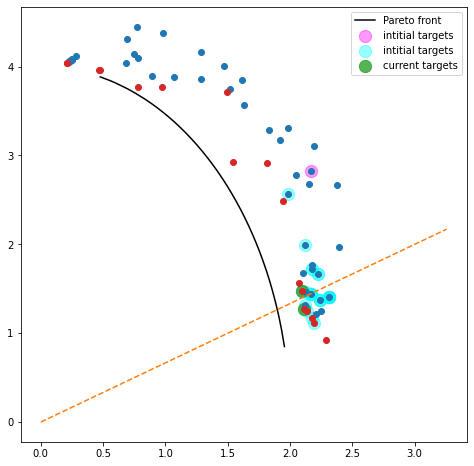

In [22]:
fig11 = plt.figure(figsize=[8, 8])
fig11_ax = fig11.gca()


fig11_ax.scatter(*np.vstack(opt.target_history[0]).T, c="magenta", label="intitial targets", alpha=0.4, s=150)
fig11_ax.scatter(*np.vstack(opt.target_history[1:]).T, c="cyan", label="intitial targets", alpha=0.4, s=150)
fig11_ax.plot(*y[np.argsort(y[:,0])].T, c="k", label="Pareto front")
fig11_ax.plot(*np.vstack((np.zeros_like(dmv), dmv*np.max([np.linalg.norm(yi) for yi in y]))).T, c="C1", linestyle="--")

fig11_ax.scatter(*opt.targets.T, c="C2", label="current targets", alpha=0.8, s=150)
fig11_ax.scatter(*opt.d.T, c="C0")
fig11_ax.scatter(*opt.p.T, c="C3")

fig11_ax.legend()

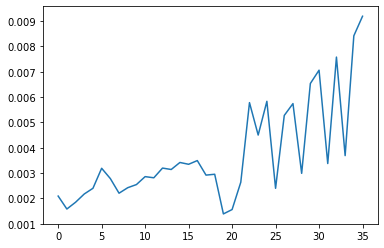

In [23]:
plt.figure()
plt.plot(opt.dm_times)